# **Aufgabe 3 - Temperatursensoren**

Die beiden Dateien `sensor_1.csv` und `sensor_2.csv` im Ordner `Daten` enthalten zeitlich aufgelöste Temperaturdaten zweier Sensoren. Für die weitere Verarbeitung der Daten ist es erforderlich, die Temperaturdifferenz zu bestimmen. Dies ist jedoch nicht ohne weiteres möglich, da beide Sensoren mit einer unterschiedlichen Aufnahmerate Daten speichern. Sensor 1 arbeitet mit einer Frequenz von 2 Hz wohingegen Sensor 2 mit 0.5 Hz aufnimmt. In folgendem Diagramm sind die Messwerte dargestellt:

![alt text](Abbildungen/plot_temperatur.png)

### **Teilaufgaben**

1. Interpolieren Sie linear die Temperaturdaten von Sensor 2 auf die Aufnahmefrequenz von Sensor 1. Nutzen Sie diesmal die Funktion [`interpolate.CubicSpline()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html) aus dem Modul `SciPy` für eine kubische Interpolation (d.h. dritter Ordnung).
2. Stellen Sie die Temperaturdifferenz zwischen beiden Sensoren in einem Diagramm dar.

### **Lösung** - Aufgabe 3

### ***Algorithmische Lösung technischer Problem WS 2024/25***

### Studenten:

+ #### **Diego Espinosa**, MN: 61505, Studiengang: BENG
+ #### **Imad Sghir**, MN: 71767, Studiengang: BENG

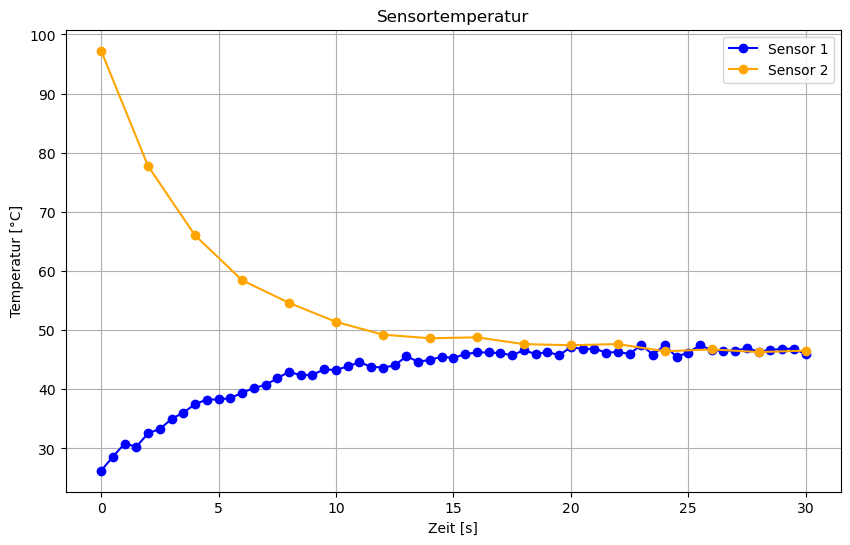

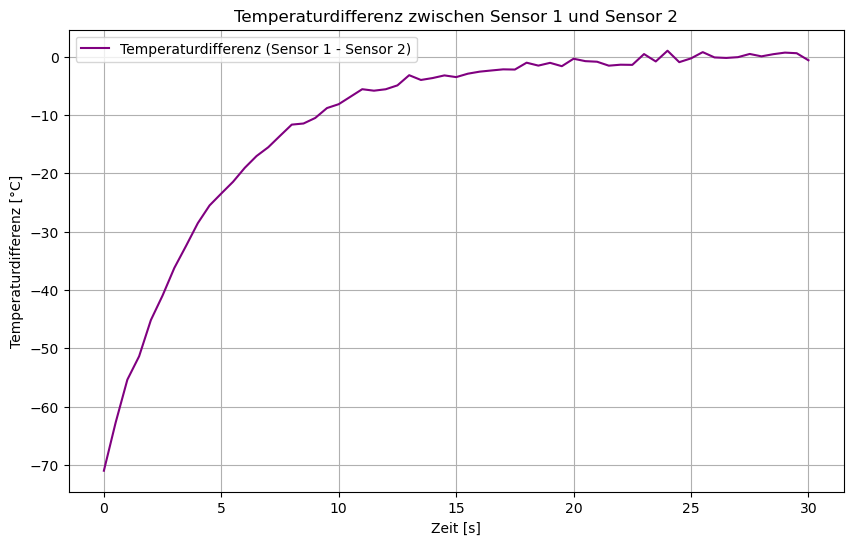

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Sensordaten hochladen
sensor_1 = pd.read_csv('Daten\sensor_1.csv', comment='#', header=None, names=['Zeit', 'Temperatur'])
sensor_2 = pd.read_csv('Daten\sensor_2.csv', comment='#', header=None, names=['Zeit', 'Temperatur'])

# Plotten Sie die ursprünglichen Temperaturen beider Sensoren.
plt.figure(figsize=(10, 6))
plt.plot(sensor_1['Zeit'], sensor_1['Temperatur'], 'o-', label='Sensor 1', color='blue')
plt.plot(sensor_2['Zeit'], sensor_2['Temperatur'], 'o-', label='Sensor 2', color='orange')
plt.xlabel('Zeit [s]')
plt.ylabel('Temperatur [°C]')
plt.title('Sensortemperatur')
plt.legend()
plt.grid(True)
plt.show()

# Teil 1: Kubische Interpolation der Daten von Sensor 2 auf Sensor 1 mal.

cs = CubicSpline(sensor_2['Zeit'], sensor_2['Temperatur'])
sensor_2_interp_temp = cs(sensor_1['Zeit'])

# Berechnen Sie die Temperaturdifferenz zwischen den Sensoren.
temp_diff = sensor_1['Temperatur'] - sensor_2_interp_temp

# Teil 2: Aufzeichnung die Temperaturdifferenz zwischen den Sensoren.

plt.figure(figsize=(10, 6))
plt.plot(sensor_1['Zeit'], temp_diff, label='Temperaturdifferenz (Sensor 1 - Sensor 2)', color='purple')
plt.xlabel('Zeit [s]')
plt.ylabel('Temperaturdifferenz [°C]')
plt.title('Temperaturdifferenz zwischen Sensor 1 und Sensor 2')
plt.legend()
plt.grid(True)
plt.show()


### Ausführliche Erläuterung des Codes

### **Teil 0:**

#### 1. Importieren der notwendigen Bibliotheken

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
```

+ ```pandas``` wird verwendet, um die CSV-Dateien zu lesen und die Daten zu verwalten.
+ ```numpy``` wird für numerische Berechnungen benötigt.
+ ```matplotlib.pyplot``` wird für das Erstellen von Diagrammen verwendet.
+ ```scipy.interpolate.CubicSpline``` bietet die Funktion für die kubische Interpolation (dritte Ordnung), die für die Aufgabe benötigt wird.


#### 2. Laden der Sensordaten aus den CSV-Dateien

```python
sensor_1 = pd.read_csv('sensor_1.csv', comment='#', header=None, names=['Zeit', 'Temperatur'])
sensor_2 = pd.read_csv('sensor_2.csv', comment='#', header=None, names=['Zeit', 'Temperatur'])
```

+ ```pd.read_csv()``` liest die CSV-Dateien für beide Sensoren ein.
+ ```comment='#'``` ignoriert die Kommentarzeile am Anfang jeder Datei.
+ ```header=None``` gibt an, dass die CSV-Dateien keine vordefinierten Kopfzeilen haben.
+ ```names=['Zeit', 'Temperatur']``` benennt die Spalten in Zeit und Temperatur.


#### 3. Darstellung der ursprünglichen Temperaturdaten für beide Sensoren

```python
plt.figure(figsize=(10, 6))
plt.plot(sensor_1['Zeit'], sensor_1['Temperatur'], 'o-', label='Sensor 1', color='blue')
plt.plot(sensor_2['Zeit'], sensor_2['Temperatur'], 'o-', label='Sensor 2', color='orange')
plt.xlabel('Zeit [s]')
plt.ylabel('Temperatur [°C]')
plt.title('Sensortemperatur')
plt.legend()
plt.grid(True)
plt.show()
```
+ ```plt.figure(figsize=(10, 6))``` legt die Größe der Abbildung fest.
+ ```plt.plot()``` erstellt ein Diagramm der gemessenen Temperaturwerte für beide Sensoren:
+ ```sensor_1``` wird in blau und ```sensor_2``` in orange dargestellt.
+ ```'o-'``` zeigt die Datenpunkte als Punkte, verbunden mit einer Linie.
+ ```plt.xlabel()``` und ```plt.ylabel()``` setzen die Achsenbeschriftungen.
+ ```plt.title()``` fügt einen Titel zum Diagramm hinzu.
+ ```plt.legend()``` zeigt eine Legende, um die beiden Sensoren zu unterscheiden.
+ ```plt.grid(True)``` aktiviert das Gitternetz für bessere Lesbarkeit.

### **Teil 1:**

#### 4. Kubische Interpolation der Temperaturdaten von Sensor 2

```python
cs = CubicSpline(sensor_2['Zeit'], sensor_2['Temperatur'])
sensor_2_interp_temp = cs(sensor_1['Zeit'])
```

+ ```CubicSpline(sensor_2['Zeit'], sensor_2['Temperatur'])``` erstellt eine kubische Interpolationsfunktion ```cs```, basierend auf den Zeit- und Temperaturwerten von Sensor 2.
+ ```cs(sensor_1['Zeit'])``` berechnet die interpolierten Temperaturwerte von Sensor 2 für die Zeitpunkte von Sensor 1. Die Ergebnisse werden in ```sensor_2_interp_temp``` gespeichert.


#### 5. Berechnung der Temperaturdifferenz zwischen den beiden Sensoren

```python
temp_diff = sensor_1['Temperatur'] - sensor_2_interp_temp
```

+ Hier wird die Temperaturdifferenz berechnet, indem die interpolierten Temperaturwerte von ```Sensor 2``` von den Temperaturwerten von ```Sensor 1``` subtrahiert werden.
+ ```temp_diff``` enthält die berechneten Differenzwerte.

### **Teil 2:**

#### 6. Darstellung der Temperaturdifferenz in einem Diagramm

```python
plt.figure(figsize=(10, 6))
plt.plot(sensor_1['Zeit'], temp_diff, label='Temperaturdifferenz (Sensor 1 - Sensor 2)', color='purple')
plt.xlabel('Zeit [s]')
plt.ylabel('Temperaturdifferenz [°C]')
plt.title('Temperaturdifferenz zwischen Sensor 1 und Sensor 2')
plt.legend()
plt.grid(True)
plt.show()
```

+ Eine neue Grafik wird erstellt, um die berechnete Temperaturdifferenz über die Zeit darzustellen.
+ ```plt.plot()``` zeigt die Temperaturdifferenz als Linie in lila.
+ Die Achsen und der Titel werden wieder entsprechend beschriftet.
+ ```plt.legend()``` und ```plt.grid(True)``` sorgen für eine Legende und ein Gitternetz, um das Diagramm besser lesbar zu machen.